In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,make_scorer

In [2]:
# data preprocress
data = pd.read_csv("Life Expectancy Data.csv")
data


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Data preprocessing

In [10]:
data['Status'].unique()
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

In [13]:
data['Country'].unique()
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])
country_before= le.inverse_transform(data['Country'])

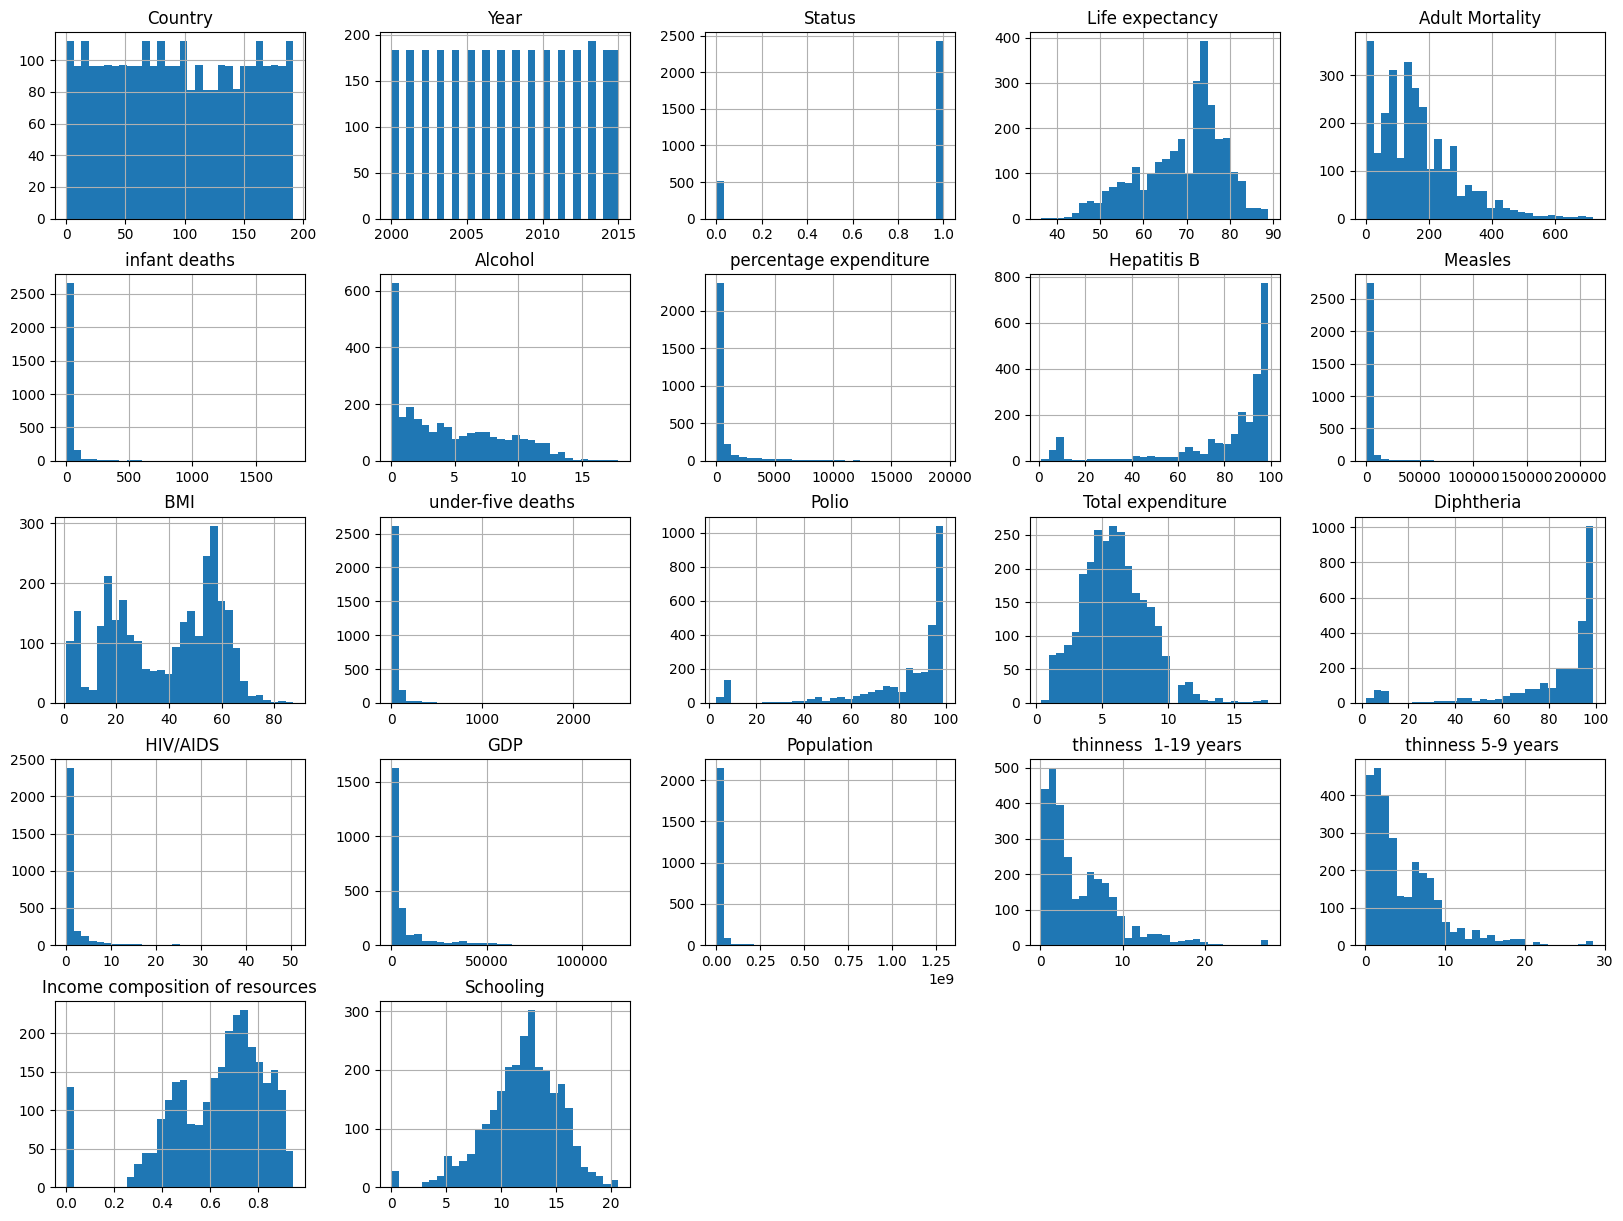

In [15]:
df = data.copy()
df.hist(bins=30, figsize=(20, 15))
plt.show()

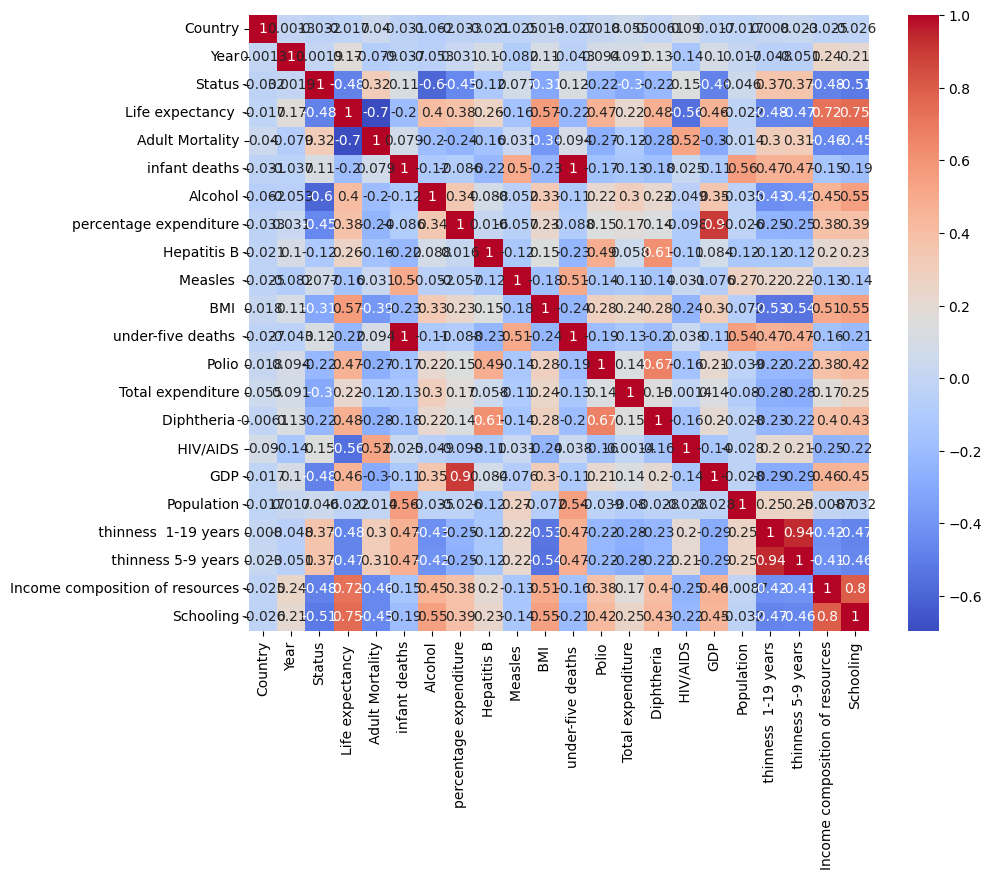

In [16]:
# Biểu đồ heatmap biểu diễn độ tương quan của dữ liệu
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [18]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [40]:
# # Điền các giá trị NULL và NaN
# df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace=True)
# df['Adult Mortality'].fillna(df['Adult Mortality'].median(), inplace=True)
# df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
# df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
# df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)
# df['Polio'].fillna(df['Polio'].median(), inplace=True)
# df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
# df['Diphtheria '].fillna(df['Diphtheria '].median(), inplace=True)
# df['GDP'].fillna(df['GDP'].median(), inplace=True)
# df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(), inplace=True)
# df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(), inplace=True)
# df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
# df['Population'].fillna(df['Population'].median(), inplace=True)
# df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

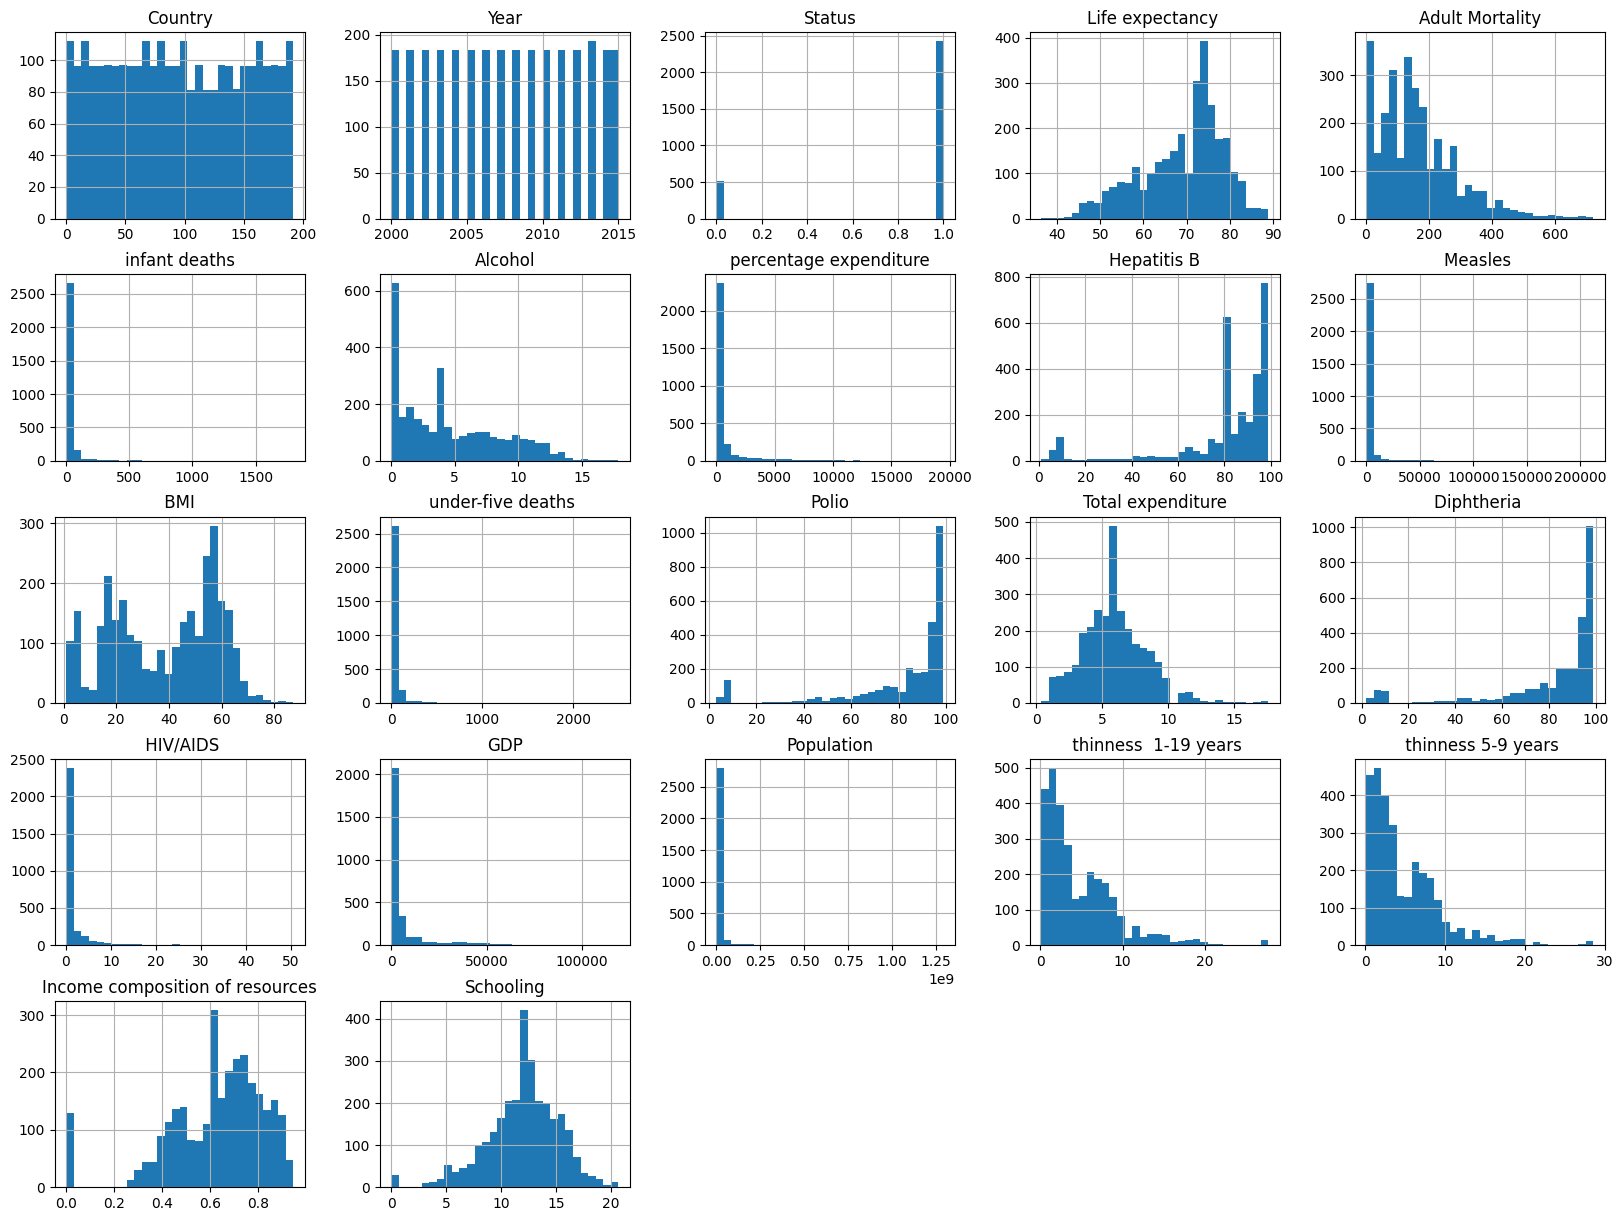

In [20]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

In [21]:
df2 = df.copy()

In [22]:
#Loại bỏ ngoại lai cho 1 số cột
columns = ['Polio', 'Income composition of resources', 'Alcohol', 'percentage expenditure', 'Hepatitis B',  ' thinness  1-19 years', ' thinness 5-9 years', 'Measles ', ' HIV/AIDS', 'Population', 'GDP']
for i in columns:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]

<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]
<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]
<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]
<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]
<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= lower_bound) & (df[i] <= upper_bound)]
<ipython-input-22-38c84ef22c0d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2[i] >= l

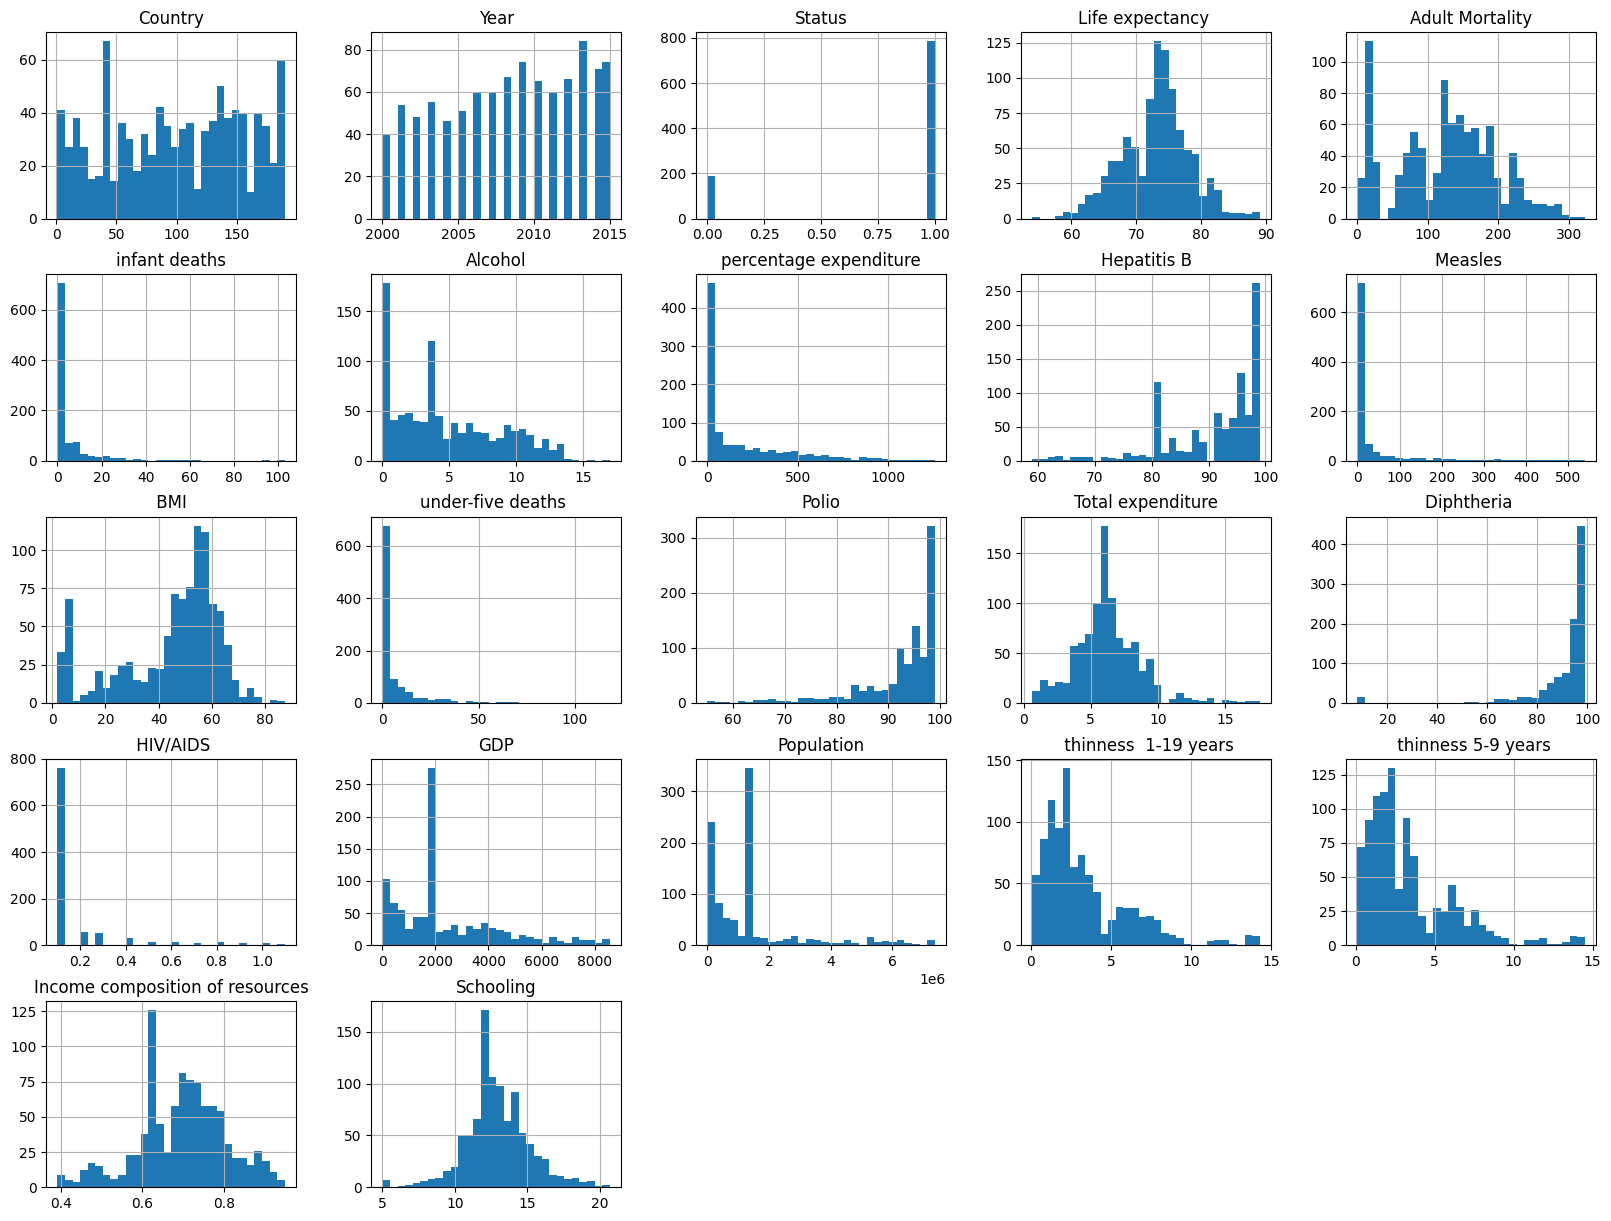

In [23]:
df2.hist(bins=30, figsize=(20, 15))
plt.show()

# Training model

## 1. Tính sai số MAE, MSE, R^2 trước khi chuẩn hóa

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = df_imputed.drop(['Life expectancy '], axis=1)
y = df_imputed['Life expectancy ']

# Split the data into training and testing sets
x_train_before, x_test_before, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Build and train the model
model = LinearRegression()
model.fit(x_train_before, y_train)
y_pred_before = model.predict(x_test_before)

In [54]:
mae_before = mean_absolute_error(y_test, y_pred_before)
print("MAE:", mae_before)
mse_before = mean_squared_error(y_test, y_pred_before)
print("MSE:", mse_before)
r2_before = r2_score(y_test, y_pred_before)
print("R^2:", r2_before)

MAE: 2.839584670354753
MSE: 14.961688847807945
R^2: 0.8273025794815947


## 2. So sách sai số trước và sau chuẩn hóa

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_before)
x_test = scaler.transform(x_test_before)

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_test)

In [58]:
# Tính MAE
mae_after = mean_absolute_error(y_test, y_pred)
print("MAE:", mae_after)
# Tính MSE
mse_after = mean_squared_error(y_test, y_pred)
print("MSE:", mse_after)
# Tính R^2
r2_after = r2_score(y_test, y_pred)
print("R^2:", r2_after)

MAE: 2.839584670354707
MSE: 14.961688847805796
R^2: 0.8273025794816196


### => các giá trị sai số sau khi chuẩn hóa và trước khi chuẩn hóa không đổi.

## 3. Sử dụng cross validation để tối ưu hóa các chỉ số

In [59]:
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lưu các giá trị MAE, MSE và R^2
mse_scores = []
mae_scores = []
r2_scores = []

# Cross-Validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Tính toán MSE, MAE và R^2 trung bình
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print(f"Mean MSE: {mean_mse}")
print(f"Mean MAE: {mean_mae}")
print(f"Mean R^2: {mean_r2}")

Mean MSE: 88.37404433523128
Mean MAE: 7.6585580953577646
Mean R^2: 0.06980562812993243


## 4. Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030

In [61]:
# Create a DataFrame for 2030 predictions
# You need to provide future values for each feature except 'Life expectancy '
# For simplicity, let's assume they remain constant
future_df = df_imputed.copy()

# Predict life expectancy for 2030
future_df['Life expectancy 2030'] = model.predict(future_df.drop(['Life expectancy '], axis=1))


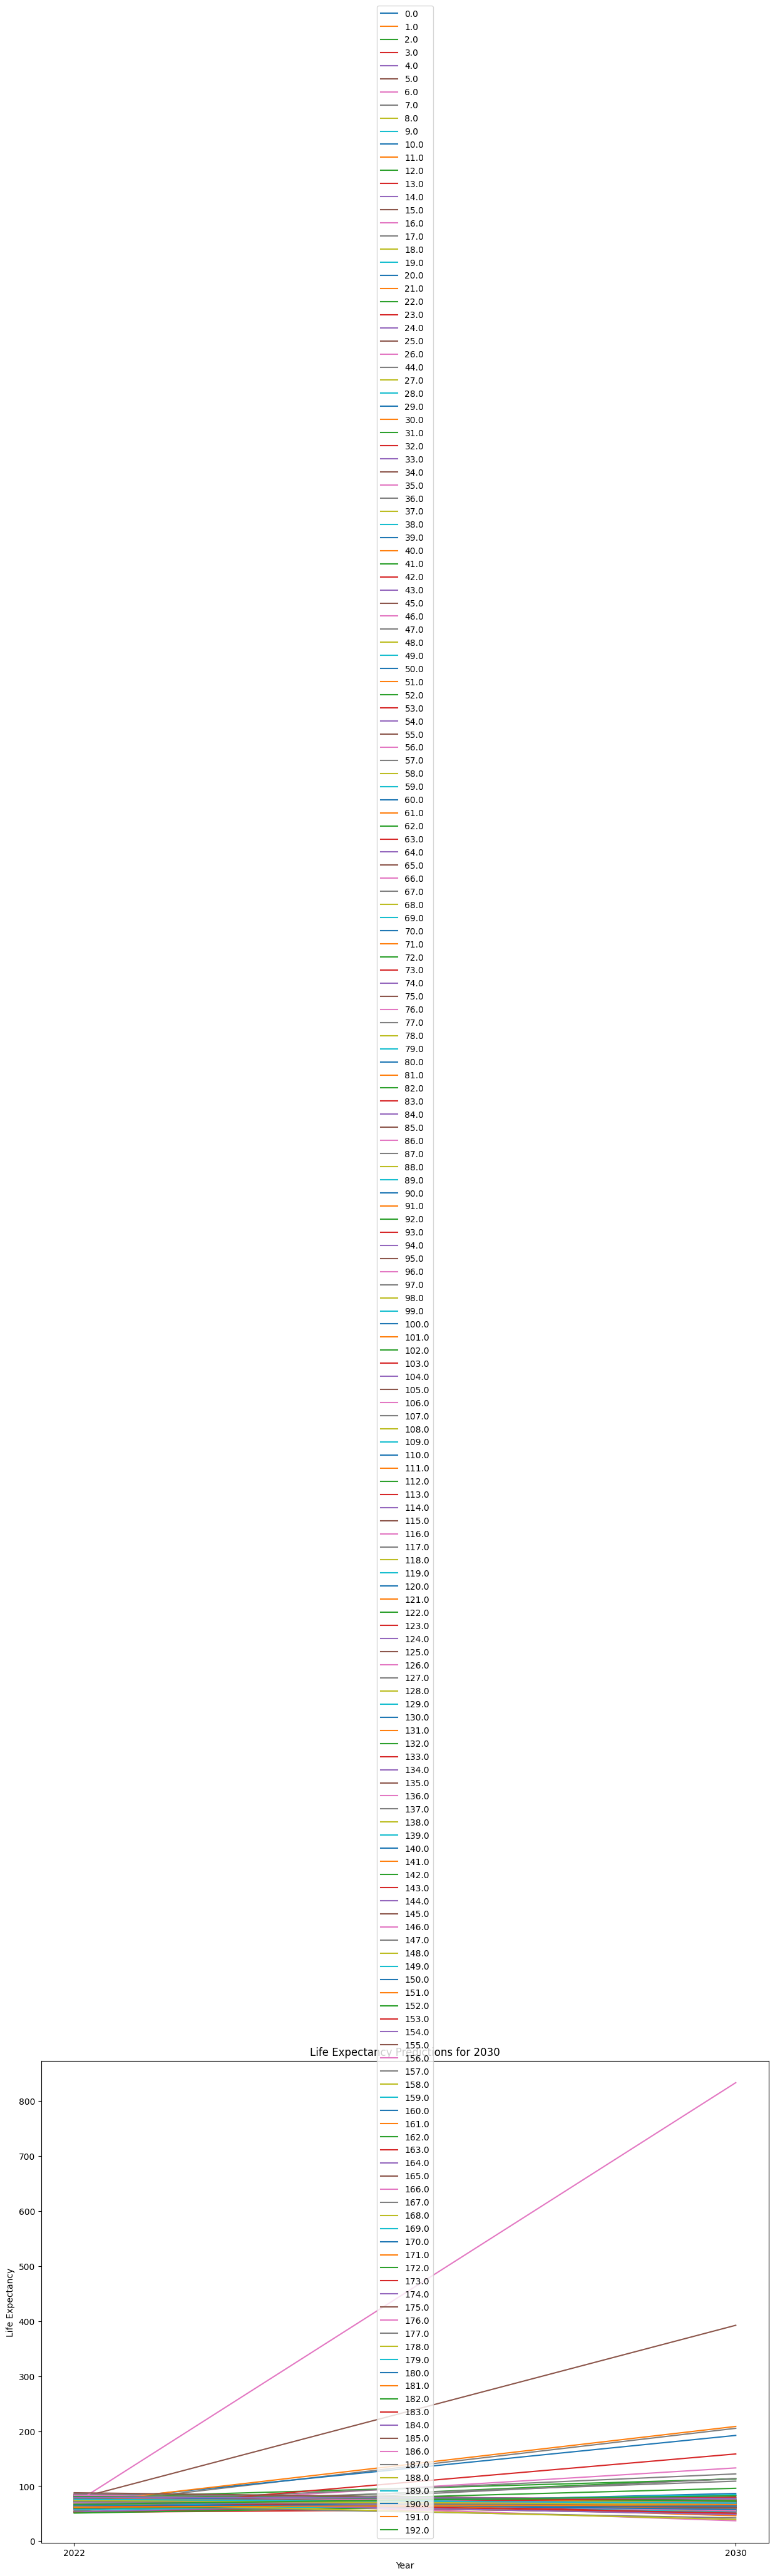

In [62]:
# Group by country and plot the results
countries = df_imputed['Country'].unique()

plt.figure(figsize=(15, 10))

for country in countries:
    country_data = future_df[future_df['Country'] == country]
    plt.plot(['2022', '2030'], [country_data['Life expectancy '].values[0], country_data['Life expectancy 2030'].values[0]], label=country)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Predictions for 2030')
plt.legend()
plt.show()
